# Import

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px

#Libraries for preprocessing
from gensim.parsing.preprocessing import remove_stopwords
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import webcolors

#Download once if using NLTK for preprocessing
import nltk
nltk.download('punkt')

#Libraries for vectorisation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from fuzzywuzzy import fuzz

#Libraries for clustering
from sklearn.cluster import KMeans


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/comerodriguez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv("Release 2 - Food Details.csv", sep=";")

# Pre processing

In [3]:
text1 = df['Food Name']
text1

0                            Cardamom seed, dried, ground
1                                 Cinnamon, dried, ground
2                                   Cloves, dried, ground
3                           Coriander seed, dried, ground
4                      Cumin (cummin) seed, dried, ground
                              ...                        
1612                    Yoghurt, coconut based, flavoured
1613             Yoghurt, flavoured, high fat (approx 5%)
1614    Yoghurt, flavoured, low fat (0.2%), intense sw...
1615              Yoghurt, flavoured, low fat (approx 2%)
1616                                            Food name
Name: Food Name, Length: 1617, dtype: object

## Removing stopwords, punctuation and numbers

In [4]:
text2 = [remove_stopwords(x)\
        .translate(str.maketrans('','',string.punctuation))\
        .translate(str.maketrans('','',string.digits))\
        for x in text1]
text2

['Cardamom seed dried ground',
 'Cinnamon dried ground',
 'Cloves dried ground',
 'Coriander seed dried ground',
 'Cumin cummin seed dried ground',
 'Curry powder',
 'Fenugreek seed dried',
 'Ginger dried ground',
 'Mustard powder',
 'Nutmeg dried ground',
 'Oregano dried',
 'Paprika dry powder',
 'Pepper black ground',
 'Rosemary dried',
 'Sage dried',
 'Thyme dried ground',
 'Turmeric dried ground',
 'Salt substitute potassium chloride',
 'Salt table iodised',
 'Salt table noniodised',
 'Stock dry powder cube',
 'Taco seasoning mix chillibased',
 'Baking powder dry powder',
 'Baking soda bicarbonate dry powder',
 'Cream tartar dry powder',
 'Gelatine types',
 'Gluten wheat vital wheat gluten',
 'Starch potato',
 'Vanilla artificial imitation',
 'Vanilla bean extract',
 'Yeast dry powder',
 'Beer high alcohol  vv  above',
 'Beer strength alcohol  vv',
 'Beer strength alcohol  vv carbohydrate modified',
 'Beer midstrength alcohol  vv',
 'Beer light alcohol  vv',
 'Alcoholic beverage sp

## Stemming and making words lower case

In [5]:
def stemSentence(sentence):
    porter = PorterStemmer()
    token_words = word_tokenize(sentence)
    stem_sentence = [porter.stem(word) for word in token_words]
    return ' '.join(stem_sentence)

In [6]:
text3 = pd.Series([stemSentence(x) for x in text2])

## Removing colours

In [7]:
colors = list(webcolors.CSS3_NAMES_TO_HEX)
colors = [stemSentence(x) for x in colors if x not in ('bisque','blanchedalmond','chocolate','honeydew','lime',
                                         'olive','orange','plum','salmon','tomato','wheat')]
text4 = [' '.join([x for x in string.split() if x not in colors]) for string in text3]

# Vectorisation

## Bag of words (counts the occurrences of words in a document)

In [8]:
vectorizer_cv = CountVectorizer(analyzer='word')
X_cv = vectorizer_cv.fit_transform(text4)

In [10]:
matrix = pd.concat([text1, pd.DataFrame(X_cv.toarray(), columns=vectorizer_cv.get_feature_names_out())], axis=1)
matrix

,Food Name,abalon,abov,acacia,ad,african,albumen,alcohol,alfalfa,allsort,...,yeast,yellowey,yellowfin,yellowtail,yoghurt,yoghurtco,yolk,young,zn,zucchini
0,"Cardamom seed, dried, ground",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Cinnamon, dried, ground",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cloves, dried, ground",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Coriander seed, dried, ground",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Cumin (cummin) seed, dried, ground",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612,"Yoghurt, coconut based, flavoured",0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1613,"Yoghurt, flavoured, high fat (approx 5%)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1614,"Yoghurt, flavoured, low fat (0.2%), intense sw...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1615,"Yoghurt, flavoured, low fat (approx 2%)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
matrix[["Food Name", "cardamom", "seed", "dri", "ground"]]

,Food Name,cardamom,seed,dri,ground
0,"Cardamom seed, dried, ground",1,1,1,1
1,"Cinnamon, dried, ground",0,0,1,1
2,"Cloves, dried, ground",0,0,1,1
3,"Coriander seed, dried, ground",0,1,1,1
4,"Cumin (cummin) seed, dried, ground",0,1,1,1
...,...,...,...,...,...
1612,"Yoghurt, coconut based, flavoured",0,0,0,0
1613,"Yoghurt, flavoured, high fat (approx 5%)",0,0,0,0
1614,"Yoghurt, flavoured, low fat (0.2%), intense sw...",0,0,0,0
1615,"Yoghurt, flavoured, low fat (approx 2%)",0,0,0,0


## TF IDF (measures the frequency of a word in a document and compares it to the frequencies of all words in the text to assign it a weighted score of importance)

In [15]:
vectorizer_wtf = TfidfVectorizer(analyzer='word')
X_wtf = vectorizer_wtf.fit_transform(text4)
matrix = pd.concat([text1, pd.DataFrame(X_wtf.toarray(), columns=vectorizer_wtf.get_feature_names_out())], axis=1)
matrix[["Food Name", "cardamom", "seed", "dri", "ground"]]

,Food Name,cardamom,seed,dri,ground
0,"Cardamom seed, dried, ground",0.666735,0.458990,0.328683,0.486580
1,"Cinnamon, dried, ground",0.000000,0.000000,0.381129,0.564221
2,"Cloves, dried, ground",0.000000,0.000000,0.369954,0.547678
3,"Coriander seed, dried, ground",0.000000,0.469829,0.336445,0.498071
4,"Cumin (cummin) seed, dried, ground",0.000000,0.381891,0.273472,0.404846
...,...,...,...,...,...
1612,"Yoghurt, coconut based, flavoured",0.000000,0.000000,0.000000,0.000000
1613,"Yoghurt, flavoured, high fat (approx 5%)",0.000000,0.000000,0.000000,0.000000
1614,"Yoghurt, flavoured, low fat (0.2%), intense sw...",0.000000,0.000000,0.000000,0.000000
1615,"Yoghurt, flavoured, low fat (approx 2%)",0.000000,0.000000,0.000000,0.000000


## TF-IDF (n-gram level)

In [17]:
vectorizer_ntf = TfidfVectorizer(analyzer='word',ngram_range=(1,2))
X_ntf = vectorizer_ntf.fit_transform(text4)
matrix = pd.concat([text1, pd.DataFrame(X_ntf.toarray(), columns=vectorizer_ntf.get_feature_names_out())], axis=1)
matrix[["Food Name", "cardamom", "seed", "dri", "ground", "cardamom seed", "seed dri", "dri ground"]]

,Food Name,cardamom,seed,dri,ground,cardamom seed,seed dri,dri ground
0,"Cardamom seed, dried, ground",0.464658,0.319877,0.229064,0.339105,0.464658,0.409334,0.361728
1,"Cinnamon, dried, ground",0.000000,0.000000,0.272238,0.403020,0.000000,0.000000,0.429907
2,"Cloves, dried, ground",0.000000,0.000000,0.268076,0.396859,0.000000,0.000000,0.423335
3,"Coriander seed, dried, ground",0.000000,0.323480,0.231644,0.342925,0.000000,0.413944,0.365803
4,"Cumin (cummin) seed, dried, ground",0.000000,0.267325,0.191432,0.283394,0.000000,0.342085,0.302301
...,...,...,...,...,...,...,...,...
1612,"Yoghurt, coconut based, flavoured",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1613,"Yoghurt, flavoured, high fat (approx 5%)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1614,"Yoghurt, flavoured, low fat (0.2%), intense sw...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1615,"Yoghurt, flavoured, low fat (approx 2%)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Latent Dirichlet Allocation (LDA) (identifies patterns in word frequency to probabilistically estimate the topics of documents and the words used in those topics.)

In [18]:
lda = LatentDirichletAllocation(n_components=30, learning_decay=0.9)
X_lda = lda.fit(X_cv)

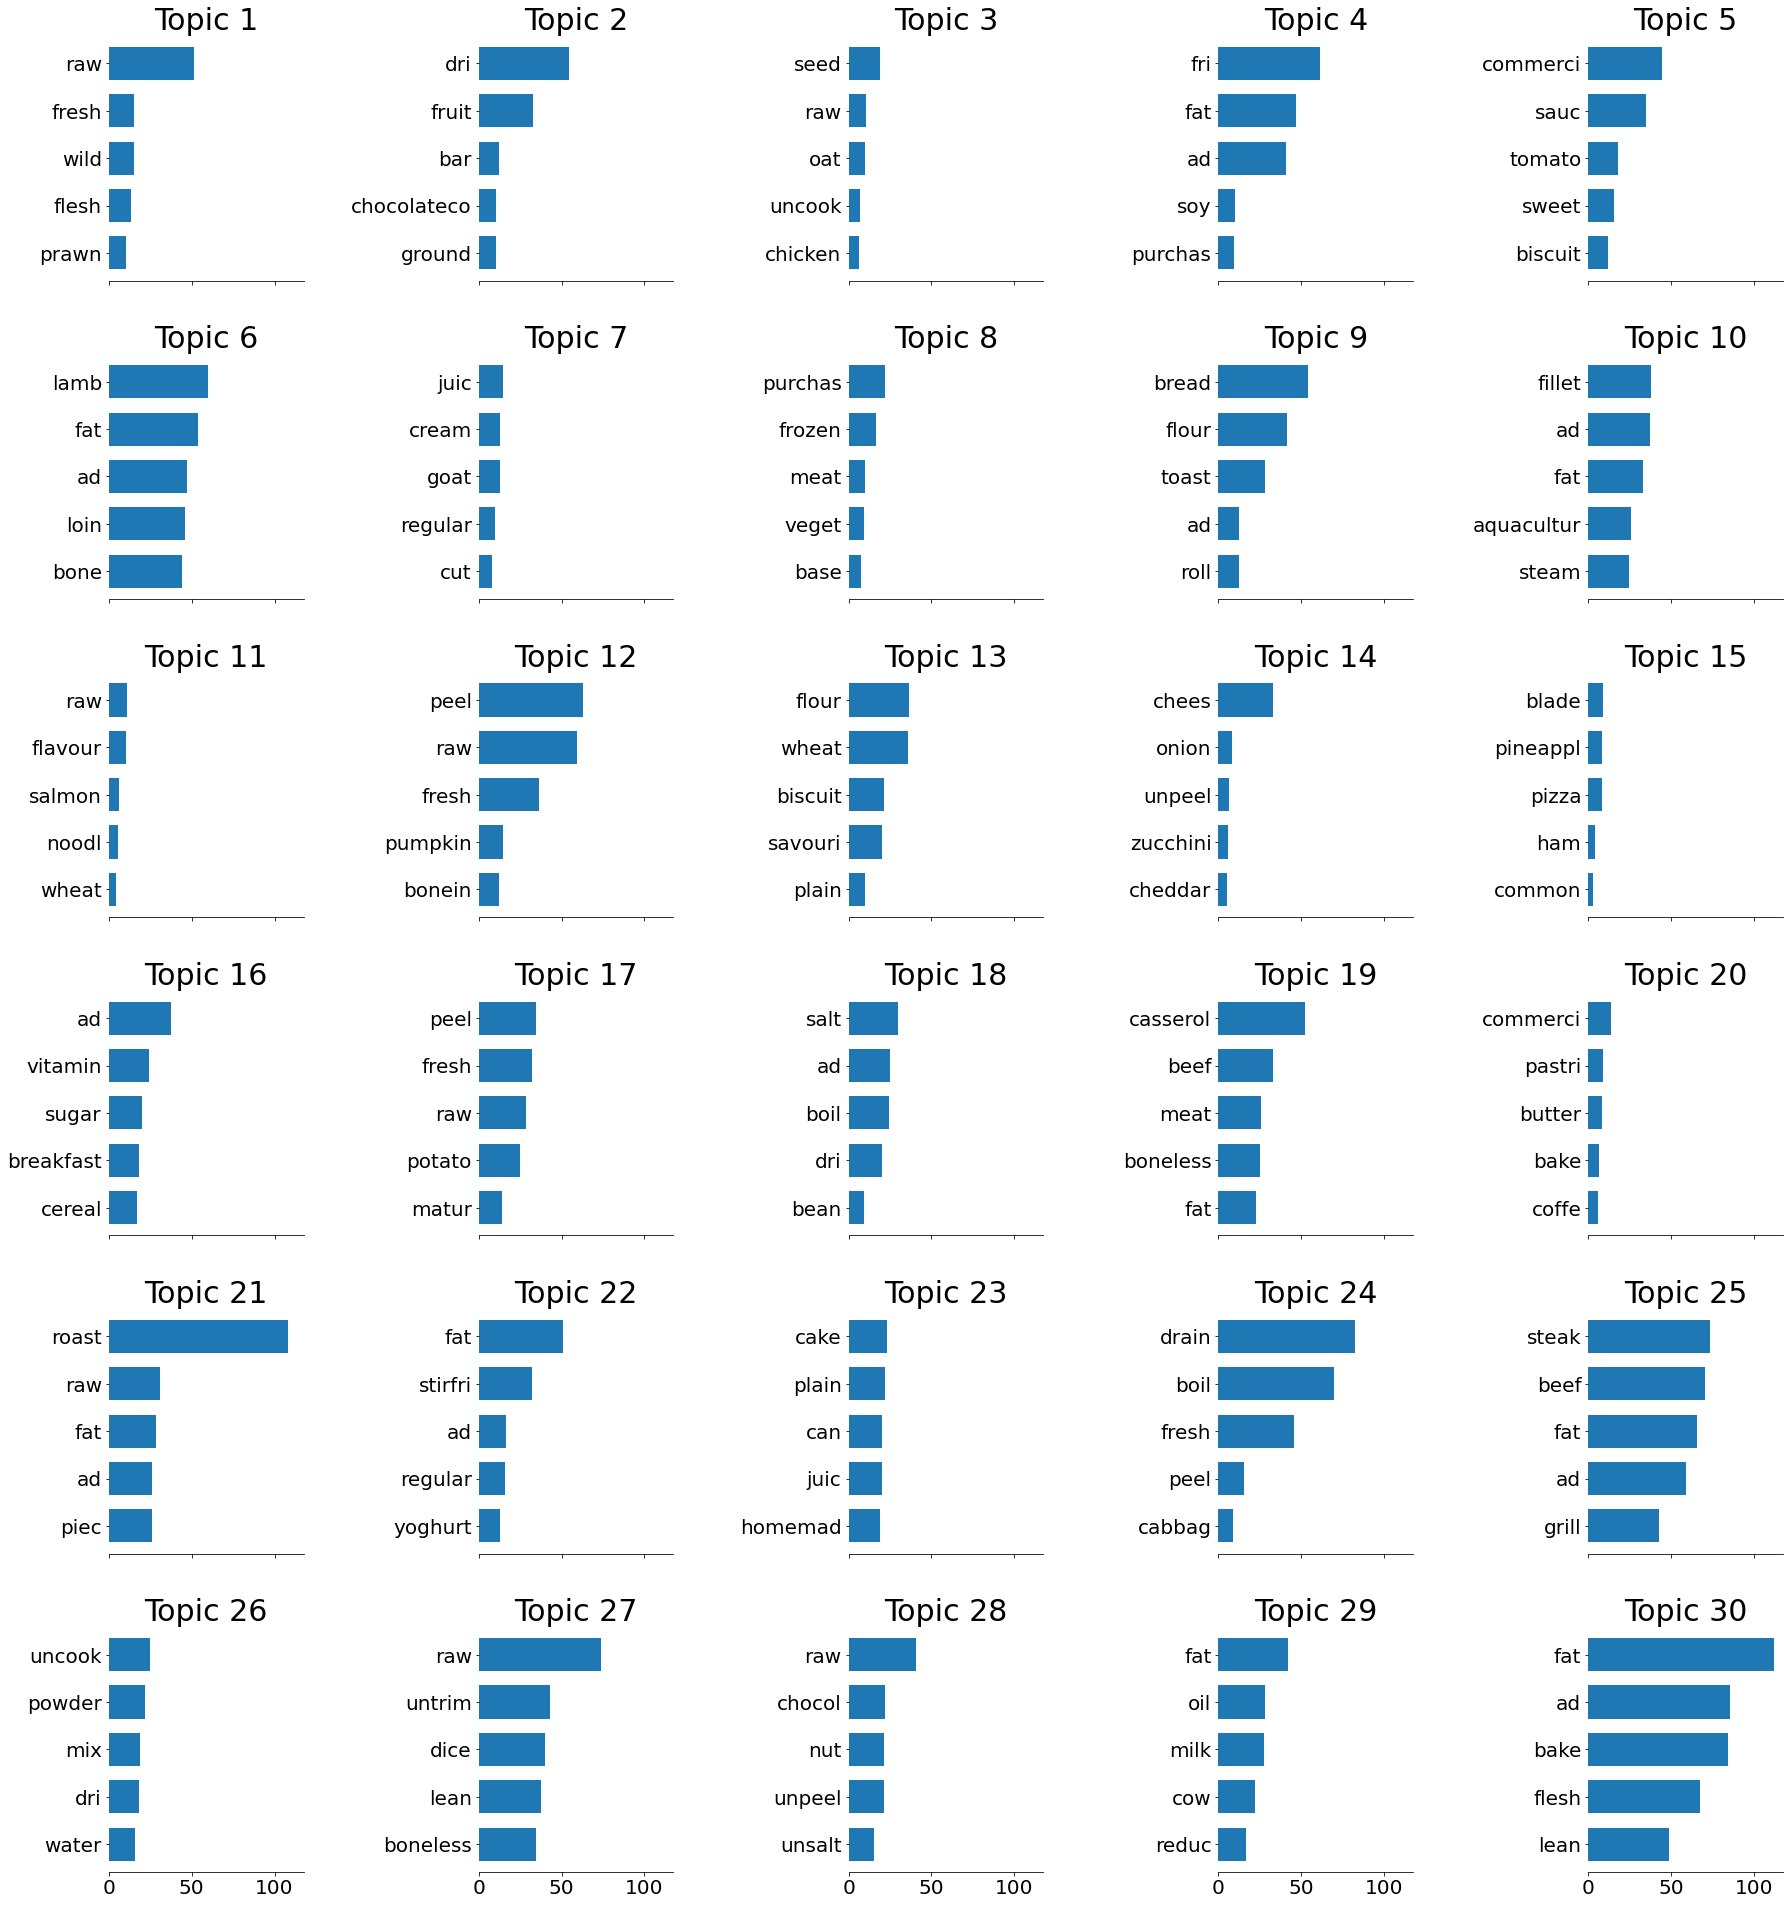

In [20]:
#Plot topics function. Code from: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(6, 5, figsize=(30, 30), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
#Show topics
n_top_words = 5
feature_names = vectorizer_cv.get_feature_names_out()
plot_top_words(X_lda, feature_names, n_top_words, '')

## Fuzzywuzzy (calculates a similarity score between two strings and is great for fuzzy (as opposed to exact) matching.)

In [23]:
X_fuzz = pd.crosstab([text4.index,text4],text4).apply(lambda col: [fuzz.token_sort_ratio(col.name, x) for x in col.index.get_level_values(1)])

In [24]:
X_fuzz.shape

(1581, 1)

# KMeans

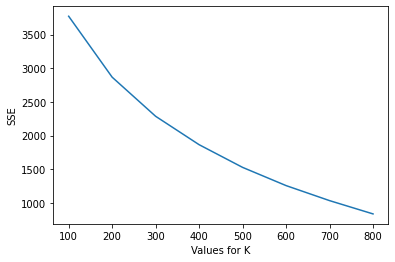

In [25]:
sse={}
for k in np.arange(100,900,100):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_cv)
    sse[k] = kmeans.inertia_
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel('Values for K')
plt.ylabel('SSE')
plt.show();

In [28]:
kmeans = KMeans(n_clusters=200)
kmeans.fit(X_cv)
result = pd.concat([text1,pd.DataFrame(X_cv.toarray(),columns=vectorizer_cv.get_feature_names_out())],axis=1)
result['cluster'] = kmeans.predict(X_cv)
result[["Food Name", "cluster"]]

,Food Name,cluster
0,"Cardamom seed, dried, ground",186
1,"Cinnamon, dried, ground",186
2,"Cloves, dried, ground",186
3,"Coriander seed, dried, ground",186
4,"Cumin (cummin) seed, dried, ground",186
...,...,...
1612,"Yoghurt, coconut based, flavoured",0
1613,"Yoghurt, flavoured, high fat (approx 5%)",0
1614,"Yoghurt, flavoured, low fat (0.2%), intense sw...",103
1615,"Yoghurt, flavoured, low fat (approx 2%)",103


In [29]:
clusters = result['cluster'].unique()
labels = []
for i in range(len(clusters)):
    subset = result[result['cluster'] == clusters[i]]
    words = ' '.join([x for x in np.where(subset.all()!=0,subset.columns,None) if x and x!='Name' and x!='cluster' and len(x.split()) == 1])
    labels.append(words)
labels_table = pd.DataFrame(zip(clusters,labels),columns=['cluster','label'])
result_labelled = pd.merge(result,labels_table,on='cluster',how='left')

In [31]:
result_labelled[["Food Name", "cluster", "label"]]

,Food Name,cluster,label
0,"Cardamom seed, dried, ground",186,ground
1,"Cinnamon, dried, ground",186,ground
2,"Cloves, dried, ground",186,ground
3,"Coriander seed, dried, ground",186,ground
4,"Cumin (cummin) seed, dried, ground",186,ground
...,...,...,...
1612,"Yoghurt, coconut based, flavoured",0,flavour
1613,"Yoghurt, flavoured, high fat (approx 5%)",0,flavour
1614,"Yoghurt, flavoured, low fat (0.2%), intense sw...",103,fat flavour yoghurt
1615,"Yoghurt, flavoured, low fat (approx 2%)",103,fat flavour yoghurt


In [35]:
pd.pivot_table(result_labelled, index=["label"], values=["Food Name"], aggfunc = "count").sort_values("Food Name", ascending=False).head(20)

,Food Name
label,
,176
raw,99
fresh,42
peel raw,40
ad fat,38
flour,32
dri,30
uncook,28
can,25
